In [1]:
# load things
%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib_colorbar import *
from numpy import linspace

from pyCDFTOOLS.cdfmoc import *

In [2]:
# load data and do relevant processing on the native grid

data_dir = "/home/julian/data/NEMO_data/eORCA1-LIM3/default/"
fileV = "eORCA1_10y_06510101_06601231_grid_V.nc"

# for putting extra options in
#   -- kt       = number for using a specified time entry (python indexing)
#   -- kz       = number for using a specified vertical level/layer (python indexing)
#   -- lprint   = True   for printing out variable names in netcdf file
kwargs = {"lprint" : False,
          "lbas"   : True}

zW, latV, dmoc, opt_dic = cdfmoc(data_dir, fileV, "vo", **kwargs)

--- Done! ---


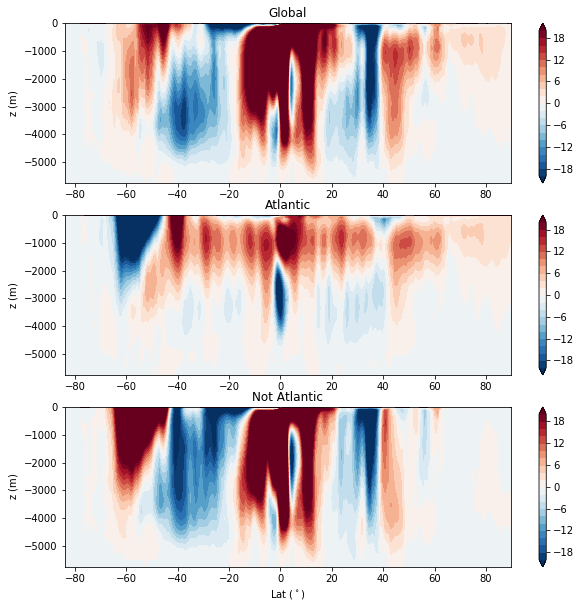

In [3]:
figure_save = False

if figure_save:
    fig = plt.figure(figsize=(10, 10), dpi = 300)
else:
    fig = plt.figure(figsize=(10, 10))
    
ax1 = plt.subplot(3, 1, 1)
plt.contourf(latV, zW, dmoc[0, :, :], linspace(-20, 20, 21), cmap = "RdBu_r", extend = "both")
#plt.xlabel(r"Lat (${}^\circ$)")
plt.ylabel(r"z ($\mathrm{m}$)")
plt.title("Global")
cb = plt.colorbar()

ax2 = plt.subplot(3, 1, 2)
plt.contourf(latV, zW, dmoc[1, :, :], linspace(-20, 20, 21), cmap = "RdBu_r", extend = "both")
#plt.xlabel(r"Lat (${}^\circ$)")
plt.ylabel(r"z ($\mathrm{m}$)")
plt.title("Atlantic")
cb = plt.colorbar()

ax3 = plt.subplot(3, 1, 3)
plt.contourf(latV, zW, dmoc[0, :, :] - dmoc[1, :, :], linspace(-20, 20, 21), cmap = "RdBu_r", extend = "both")
plt.xlabel(r"Lat (${}^\circ$)")
plt.ylabel(r"z ($\mathrm{m}$)")
plt.title("Not Atlantic")
cb = plt.colorbar()

if figure_save:
    fig.savefig(save_filename, bbox_inches = "tight")
    plt.close(fig)
    
print("--- Done! ---")